<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Grab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00


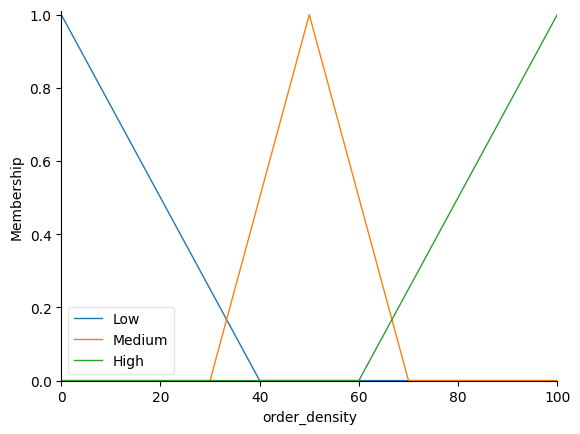

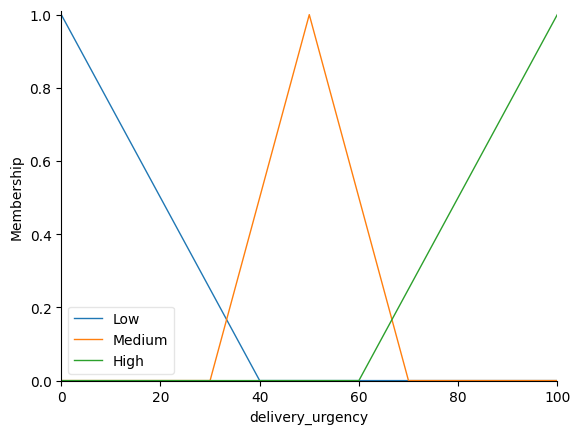

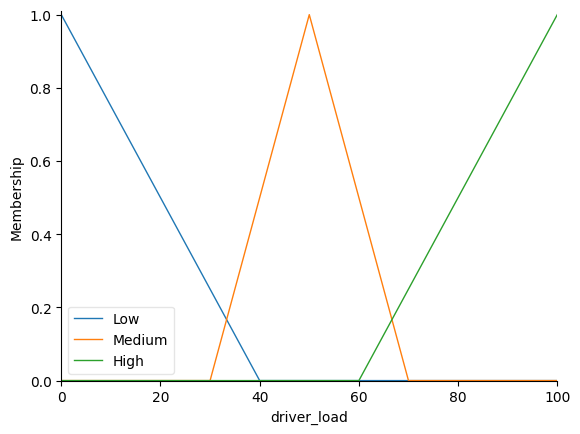

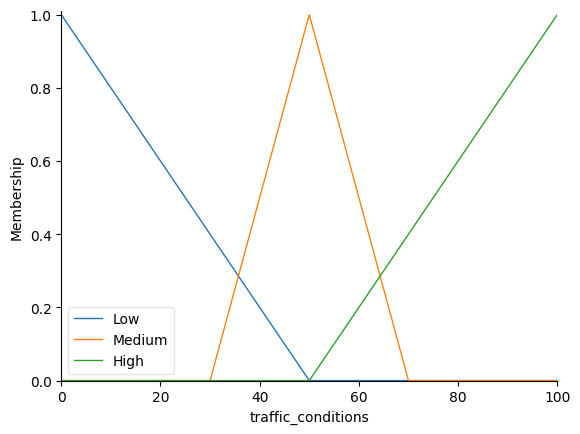

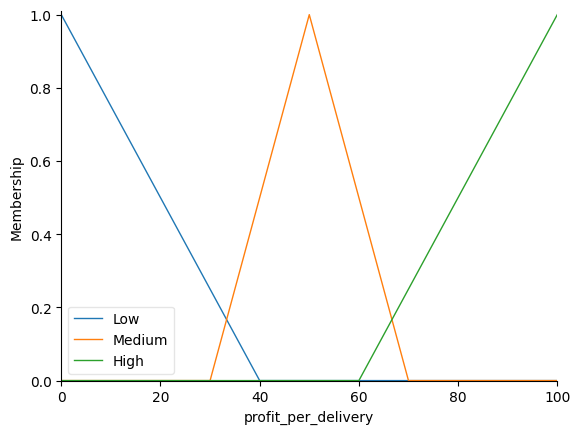

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khai báo các biến mờ (Antecedents - đầu vào)
order_density = ctrl.Antecedent(np.arange(0, 101, 1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 101, 1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 101, 1), 'driver_load')
traffic_conditions = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_conditions')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_per_delivery')

# Khai báo biến mờ đầu ra (Consequents - đầu ra)
orders_to_combine = ctrl.Consequent(np.arange(0, 101, 1), 'orders_to_combine')
delivery_priority = ctrl.Consequent(np.arange(0, 11, 1), 'delivery_priority')

# Định nghĩa hàm thành viên cho từng biến đầu vào
order_density['Low'] = fuzz.trimf(order_density.universe, [0, 0, 40])
order_density['Medium'] = fuzz.trimf(order_density.universe, [30, 50, 70])
order_density['High'] = fuzz.trimf(order_density.universe, [60, 100, 100])

delivery_urgency['Low'] = fuzz.trimf(delivery_urgency.universe, [0, 0, 40])
delivery_urgency['Medium'] = fuzz.trimf(delivery_urgency.universe, [30, 50, 70])
delivery_urgency['High'] = fuzz.trimf(delivery_urgency.universe, [60, 100, 100])

driver_load['Low'] = fuzz.trimf(driver_load.universe, [0, 0, 40])
driver_load['Medium'] = fuzz.trimf(driver_load.universe, [30, 50, 70])
driver_load['High'] = fuzz.trimf(driver_load.universe, [60, 100, 100])

traffic_conditions['Low'] = fuzz.trimf(traffic_conditions.universe, [0, 0, 50])
traffic_conditions['Medium'] = fuzz.trimf(traffic_conditions.universe, [30, 50, 70])
traffic_conditions['High'] = fuzz.trimf(traffic_conditions.universe, [50, 100, 100])

profit_per_delivery['Low'] = fuzz.trimf(profit_per_delivery.universe, [0, 0, 40])
profit_per_delivery['Medium'] = fuzz.trimf(profit_per_delivery.universe, [30, 50, 70])
profit_per_delivery['High'] = fuzz.trimf(profit_per_delivery.universe, [60, 100, 100])

# Định nghĩa hàm thành viên cho biến đầu ra
orders_to_combine['Few'] = fuzz.trimf(orders_to_combine.universe, [0, 0, 40])
orders_to_combine['Some'] = fuzz.trimf(orders_to_combine.universe, [30, 50, 70])
orders_to_combine['Many'] = fuzz.trimf(orders_to_combine.universe, [60, 100, 100])

delivery_priority['Low'] = fuzz.trimf(delivery_priority.universe, [0, 0, 5])
delivery_priority['Medium'] = fuzz.trimf(delivery_priority.universe, [3, 5, 7])
delivery_priority['High'] = fuzz.trimf(delivery_priority.universe, [5, 10, 10])

order_density.view()
delivery_urgency.view()
driver_load.view()
traffic_conditions.view()
profit_per_delivery.view()

In [ ]:
rule1 = ctrl.Rule(order_density['High'] & driver_load['Low'] & traffic_conditions['Low'], orders_to_combine['Many'])
rule2 = ctrl.Rule(order_density['Medium'] & traffic_conditions['High'] & delivery_urgency['Medium'], orders_to_combine['Some'])
rule3 = ctrl.Rule(driver_load['High'] & order_density['High'] & profit_per_delivery['Medium'], orders_to_combine['Some'])
rule4 = ctrl.Rule(order_density['Low'] & delivery_urgency['High'] & traffic_conditions['Medium'], orders_to_combine['Some'])
rule5 = ctrl.Rule(profit_per_delivery['High'] & delivery_urgency['High'] & traffic_conditions['High'], orders_to_combine['Some'])
rule6 = ctrl.Rule(delivery_urgency['High'] & profit_per_delivery['High'], delivery_priority['High'])
rule7 = ctrl.Rule(delivery_urgency['Medium'] & traffic_conditions['Medium'], delivery_priority['Medium'])
rule8 = ctrl.Rule(delivery_urgency['Low'] & order_density['High'] & profit_per_delivery['Low'], delivery_priority['Low'])


Number of Orders to Combine: 81.92592592592588
Delivery Priority: 4.999999999999999


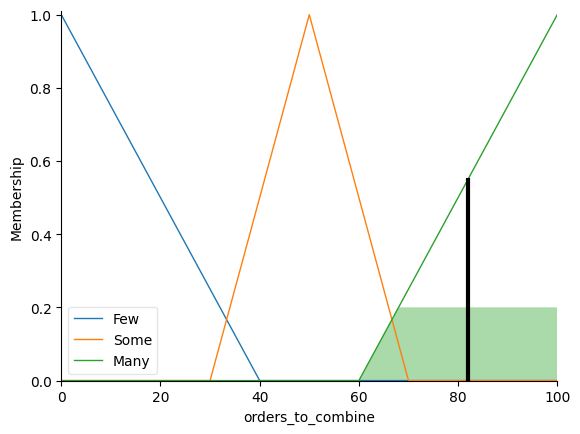

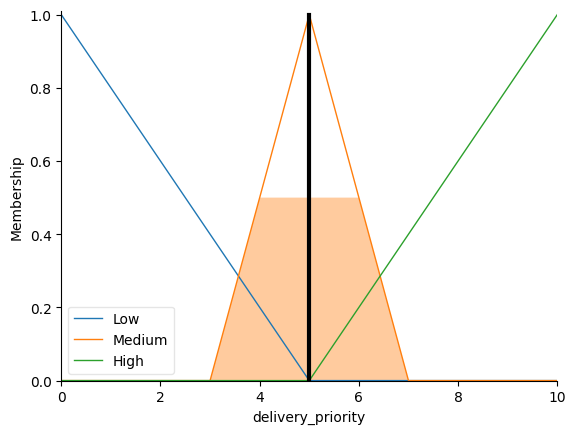

In [ ]:
# Tạo hệ thống điều khiển mờ
bai4_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
bai4_simulation = ctrl.ControlSystemSimulation(bai4_ctrl)

# Cung cấp giá trị đầu vào
bai4_simulation.input['order_density'] = 70  # High
bai4_simulation.input['delivery_urgency'] = 60  # Medium
bai4_simulation.input['driver_load'] = 20  # Low
bai4_simulation.input['traffic_conditions'] = 40  # Medium
bai4_simulation.input['profit_per_delivery'] = 65  # Medium

# Tính toán đầu ra
bai4_simulation.compute()

# Xuất kết quả
print("Number of Orders to Combine:", bai4_simulation.output['orders_to_combine'])
print("Delivery Priority:", bai4_simulation.output['delivery_priority'])

# Hiển thị biểu đồ
orders_to_combine.view(sim=bai4_simulation)
delivery_priority.view(sim=bai4_simulation)
